In [3]:
import sys
print(sys.executable)  # 打印当前的 Python 解释器路径

import ipykernel
print(ipykernel.__file__)  # 打印当前的 ipykernel 包路径

/Users/captain/miniconda3/envs/dbscan/bin/python
/Users/captain/miniconda3/envs/dbscan/lib/python3.10/site-packages/ipykernel/__init__.py


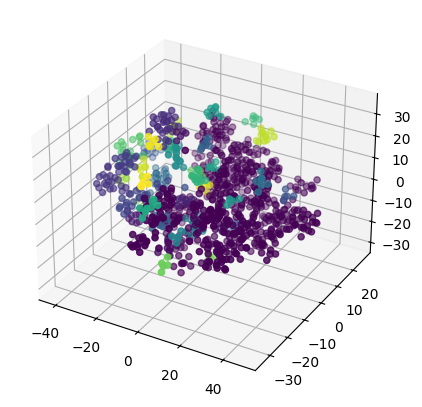

不错，第二次来了
味道不错，第二次来了，服务不过，环境不错
第二次来了，孩子很满意。
味道很不错，第二次来了，就是wifi一直在维护
鱼相当好吃，第二次来了，百吃不厌
很不错！第二次来了！下次还来！服务态度没得说！
好吃，第二次来了
很不错，第二次来了，值得推荐！
很好吃，美味可口，第二次来了！
好吃第二次来了

Cluster: -1
Number of comments in this cluster: 9008
Sample comments:
今天來吃他家的培根炒饭，真心更好吃，炒的饭色泽很好，一看就好有食欲，还有免费汤和泡菜，下次还会再来
太少了48元呀怪自己
还不错吧，经常过去吃，老板对人也很好
相当不错的呀、味道也很好、我们还是点的不辣的、可以不错
去了好多次，还是不错的

Cluster: 0
Number of comments in this cluster: 631
Sample comments:
服务好 菜品新鲜 价格小贵 鸡有特色
味道很好很不错
可以 环境不错 服务不错 味道不错
去过很多次了，还是一如既往的赞。
很不错，一如既往的好！！

Cluster: 1
Number of comments in this cluster: 10
Sample comments:
很不错！第二次来了！下次还来！服务态度没得说！
不错，第二次来了
鱼相当好吃，第二次来了，百吃不厌
很好吃，美味可口，第二次来了！
好吃，第二次来了

Cluster: 2
Number of comments in this cluster: 5
Sample comments:
食材不好，吃了第二天拉肚子
味道不怎样，分量少，吃了第二天拉肚子
估计没熟，或者不干净吃了，第二天拉肚子！
口味一般。 变味了。吃了第二天拉肚子
不新鲜，吃了第二天拉肚子。大失所望，比起去店里面的差太多。

Cluster: 3
Number of comments in this cluster: 9
Sample comments:
态羞了一点都不好吃
虾少还小  一点都不好吃
红烧肉一点都不好吃
很难吃，味道一点都不好
服务态度一点都不

Cluster: 4
Number of comments in this cluster: 6
Sample comments:
一如既往的味道

In [4]:

# 加载所需要的包
import jieba
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tsne import TSNEDisplayer

# 设置工作空间 & 读取数据
train = pd.read_csv('./train.csv', sep='\t')

data = train['comment'].apply(lambda x: ' '.join(jieba.lcut(x)))
vectorizer_word = TfidfVectorizer(max_features=800000,
                                  token_pattern=r"(?u)\b\w+\b",
                                  min_df=5,
                                  # max_df=0.1,
                                  analyzer='word',
                                  ngram_range=(1, 2)
                                  )
vectorizer_word = vectorizer_word.fit(data)
tfidf_matrix = vectorizer_word.transform(data)

# 进行模型训练
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.95, min_samples=5).fit(tfidf_matrix)

pd.set_option('display.max_rows', 1000)
TSNEDisplayer().show(tfidf_matrix, clustering)

# 我们看看分了所少个群，每个群的样本数是多少
len(pd.Series(clustering.labels_).value_counts())

pd.Series(clustering.labels_).value_counts()

# 分群标签打进原来的数据
train['labels_'] = clustering.labels_

# 抽取编号为5的群看看 可以看到，这个群都是吃拉肚子的反馈，聚类效果还是非常可以的
for i in train[train['labels_'] == 1]['comment']:
    print(i)

# 对每个标签分组，然后抽出几个样本查看
grouped = train.groupby('labels_')

for name, group in grouped:
    print("\nCluster:", name)
    print("Number of comments in this cluster:", len(group))
    print("Sample comments:")
    # 抽取5个样本查看
    if len(group) >= 5:
        # 抽取5个样本查看
        sample_comments = group['comment'].sample(5)
    else:
        # 如果样本数少于5，则全部输出
        sample_comments = group['comment']
    for comment in sample_comments:
        print(comment)
